In [4]:
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
import numpy as np
import pathlib
import helper_functions
import tensorflow as tf
import webscraping


In [5]:
#LOAD LABELS
Z = helper_functions.load_labels(14000)


input_images/kanjiRandom.png - file
input_images/kanjiRandom2.png - file
input_images/KanjiScreenShot.png - file
input_images/KanjiScreenShot2.png - file
input_images/sizeTest.png - file
<class 'numpy.ndarray'> (474, 471, 3)


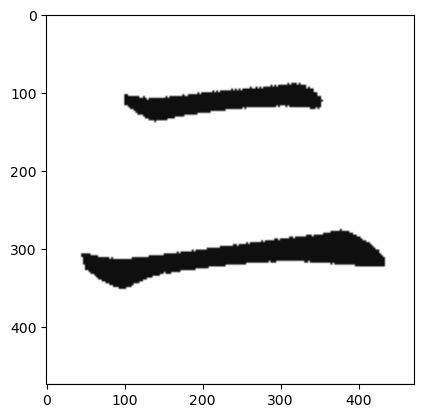

In [6]:
#FIND IMAGE
input_images = pathlib.Path("input_images")
list(input_images.iterdir())

input_images_strings = []
for item in input_images.iterdir():
    input_images_strings.append(str(item))
    print(f"{item} - {'dir' if item.is_dir() else 'file'}")

img = cv2.imread(input_images_strings[0])   # Read the image
print(type(img),img.shape)
plt.imshow(img)

<class 'numpy.ndarray'> (64, 64, 3)


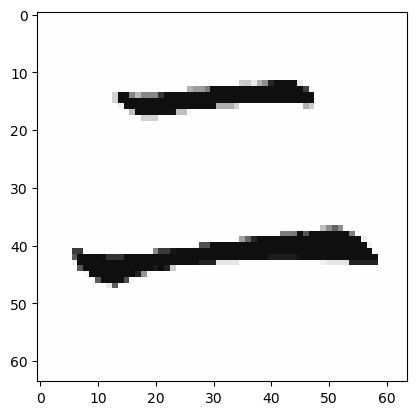

In [7]:
#RESIZE
smallImg = helper_functions.resize(img, 64)
print(type(smallImg),smallImg.shape)
plt.imshow(smallImg)

In [8]:
#SHAPE IMAGE
new_image = cv2.cvtColor(smallImg, cv2.COLOR_RGB2GRAY)
new_image = cv2.bitwise_not(new_image)
new_image=np.array(new_image)
new_image=new_image/255

In [9]:
#PREDICTION
model = keras.models.load_model('../Kanji-recognizer/saved_sequential_model')

dim_img = tf.expand_dims(new_image, 0)
predictions = model.predict(dim_img)
predicted_classes = predictions.argmax(axis=-1)

print('Predictions shape:', predictions.shape)
print('Predictions:', predictions)
print('Predicted class:', predicted_classes)
print(dim_img)



2023-05-17 11:55:53.554913: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-17 11:55:53.555078: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-17 11:55:53.555147: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6047883d479a): /proc/driver/nvidia/version does not exist
2023-05-17 11:55:53.556357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate com

1/1 [==============================] - 0s 164ms/step
Predictions shape: (1, 79)
Predictions: [[3.6000130e-09 3.0929634e-09 3.0098175e-07 1.6530389e-07 2.4883597e-08
  3.8712407e-09 5.2284652e-09 2.3055611e-08 1.2112641e-08 4.2344169e-08
  7.5817660e-08 6.7202603e-07 2.7163145e-08 2.6691467e-08 2.8289344e-09
  2.6273574e-06 2.7017794e-08 1.0544241e-04 2.9769704e-02 8.6621476e-05
  9.6968886e-09 6.8014388e-06 1.0005651e-05 2.3119553e-06 8.5827004e-08
  8.4346981e-11 7.1350009e-08 1.1195062e-07 3.2171869e-08 3.0640877e-08
  1.5810343e-08 5.4631505e-06 8.4231688e-06 3.5741529e-08 4.4393476e-09
  7.7505531e-09 3.9287615e-06 5.4147449e-08 5.6823453e-09 3.4062663e-07
  3.1577519e-04 1.3761117e-05 5.5544341e-08 3.3770008e-05 4.4860221e-07
  3.1547069e-07 3.9734996e-06 6.3179577e-08 1.4908299e-08 1.0699200e-08
  4.0618361e-06 6.3447182e-08 5.2112017e-09 4.1606739e-08 6.7860704e-08
  7.7733325e-10 1.6593289e-08 4.7857134e-07 1.9735062e-07 4.7938192e-06
  9.6952081e-01 5.9641437e-08 5.7347152e-06

In [10]:
#WEBSCRAPE MEANING

print(np.unique(Z)[predicted_classes][0])
print(helper_functions.to_kanji(np.unique(Z)[predicted_classes][0]))

webscraping.get_meaning(helper_functions.to_kanji(np.unique(Z)[predicted_classes][0]))

U+4E8C
二

two, 
two radical (no. 7)

